In [1]:
# We have imported required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df_cont = pd.read_csv("control_group.csv")

In [3]:
df_cont.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [81]:
#lets check missing values
df_cont.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [5]:
# Define the column name cleaning function
def to_clean(val):
    return val.strip().lower().replace("# ", "").replace("of ", "").replace(" ","_").replace("[usd]", "usd")

In [6]:
# Rename columns using the cleaning function
df_cont.columns = df_cont.columns.map(to_clean)


In [7]:
# Fill missing values in numeric columns with zeros
numeric_columns = ['impressions', 'reach', 'website_clicks', 'searches', 'view_content', 'add_to_cart', 'purchase']
df_cont[numeric_columns] = df_cont[numeric_columns].fillna(0)

In [8]:
# Convert the "date" column to datetime format
df_cont['date'] = pd.to_datetime(df_cont['date'], format='%d.%m.%Y')


In [9]:
# Drop rows with missing "campaign_name"
df_cont.dropna(subset=['campaign_name'], inplace=True)


In [10]:
#lets again check missing values
df_cont.isnull().sum()

campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

In [11]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_data.csv'
df_cont.to_csv(cleaned_file_path, index=False)

# Display the cleaned DataFrame
df_cont.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_test = pd.read_csv("test_group.csv")

In [13]:
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [15]:
#lets check missing values
df_test.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [16]:
# Define the column name cleaning function
def to_clean(val):
    return val.strip().lower().replace("# ", "").replace("of ", "").replace(" ","_").replace("[usd]", "usd") 

In [17]:
# Rename columns using the cleaning function
df_test.columns = df_test.columns.map(to_clean)

In [18]:
# Fill missing values in numeric columns with zeros
numeric_columns = ['impressions', 'reach', 'website_clicks', 'searches', 'view_content', 'add_to_cart', 'purchase']
df_test[numeric_columns] = df_test[numeric_columns].fillna(0)

In [19]:
# Convert the "date" column to datetime format
df_test['date'] = pd.to_datetime(df_test['date'], format='%d.%m.%Y')

In [20]:
# Drop rows with missing "campaign_name"
df_test.dropna(subset=['campaign_name'], inplace=True)

In [21]:
# Display the cleaned DataFrame
df_test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [22]:
# Concatenate the DataFrames
merged_df = df_cont.merge(df_test, how='outer').sort_values(['date']).reset_index(drop= True)

# Save the merged DataFrame to a new CSV file
merged_file_path = 'merged_data.csv'
merged_df.to_csv(merged_file_path, index=False)

#lets check first five rows
merged_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [23]:
#lets check last five rows
merged_df.tail()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
55,Control Campaign,2019-08-28,2421,141654.0,125874.0,6287.0,1672.0,1589.0,1711.0,643.0
56,Test Campaign,2019-08-29,2805,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0
57,Control Campaign,2019-08-29,2375,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0
58,Control Campaign,2019-08-30,2324,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,670.0
59,Test Campaign,2019-08-30,1977,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,572.0


In [24]:
merged_df.isnull().sum()

campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

In [25]:
#lets check info of data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_name   60 non-null     object        
 1   date            60 non-null     datetime64[ns]
 2   spend_usd       60 non-null     int64         
 3   impressions     60 non-null     float64       
 4   reach           60 non-null     float64       
 5   website_clicks  60 non-null     float64       
 6   searches        60 non-null     float64       
 7   view_content    60 non-null     float64       
 8   add_to_cart     60 non-null     float64       
 9   purchase        60 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 4.8+ KB


In [26]:
#lets check shape
merged_df.shape

(60, 10)

In [27]:
#lets check columns of data
merged_df.columns

Index(['campaign_name', 'date', 'spend_usd', 'impressions', 'reach',
       'website_clicks', 'searches', 'view_content', 'add_to_cart',
       'purchase'],
      dtype='object')

In [28]:
merged_df.duplicated().sum()

0

In [29]:
merged_df.describe()

,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000
mean,2425.750000,90246.283333,69687.500000,5587.883333,2283.116667,1868.500000,1069.100000,513.30000
std,381.130461,34300.101115,32091.434288,1888.187348,727.925520,724.226051,449.043945,206.59748
min,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2073.750000,67039.750000,43129.000000,4219.750000,1939.500000,1246.750000,811.250000,340.00000
50%,2420.500000,95448.500000,75205.500000,5581.000000,2374.500000,1934.500000,1067.000000,500.00000
75%,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.00000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.00000


In [30]:
merged_df.corr()

,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
spend_usd,1.000000,0.013633,-0.046294,0.027410,0.103223,0.049721,-0.069441,0.095482
impressions,0.013633,1.000000,0.897303,-0.049031,-0.009112,0.058374,0.356870,0.158715
reach,-0.046294,0.897303,1.000000,-0.129142,0.007072,0.064486,0.308869,0.128205
website_clicks,0.027410,-0.049031,-0.129142,1.000000,0.470208,0.494288,0.121202,0.097848
searches,0.103223,-0.009112,0.007072,0.470208,1.000000,0.902990,0.154313,0.164920
view_content,0.049721,0.058374,0.064486,0.494288,0.902990,1.000000,0.238631,0.163291
add_to_cart,-0.069441,0.356870,0.308869,0.121202,0.154313,0.238631,1.000000,0.448299
purchase,0.095482,0.158715,0.128205,0.097848,0.164920,0.163291,0.448299,1.000000


# Data Visualization

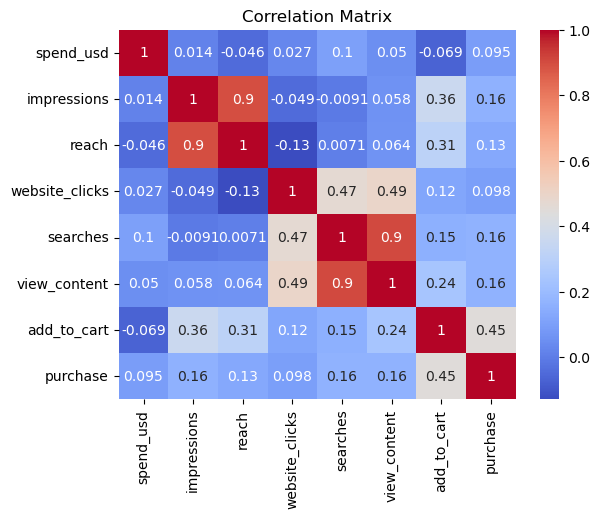

In [31]:
# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

1.Positive correlations are observed between spending (spend_usd) and variables such as website clicks, searches, view content, and purchase.

2.This suggests that higher spending aligns with higher values in these variables.

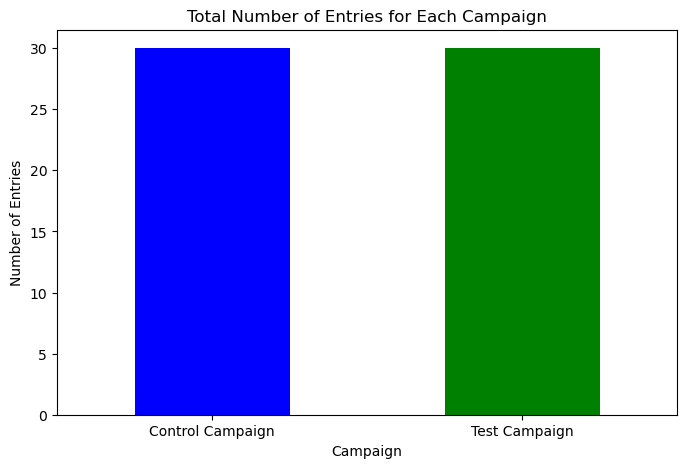

In [104]:
# Count the number of entries for each campaign
campaign_counts = merged_df['campaign_name'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
campaign_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Total Number of Entries for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

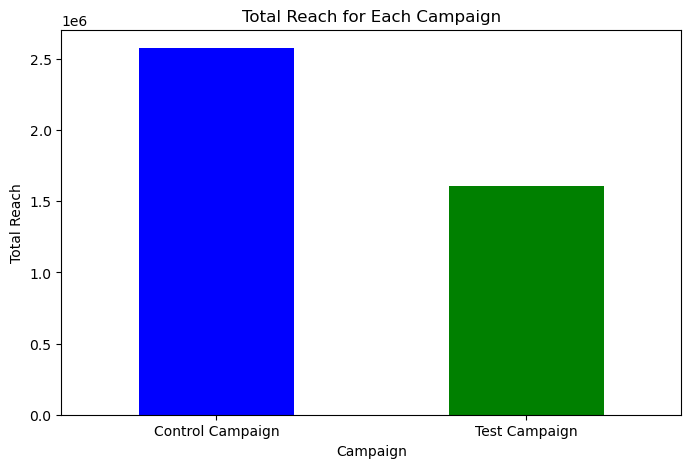

In [105]:
# Calculate the total reach for each campaign
total_reach = merged_df.groupby('campaign_name')['reach'].sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
total_reach.plot(kind='bar', color=['blue', 'green'])
plt.title('Total Reach for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Total Reach')
plt.xticks(rotation=0)
plt.show()

1.The "Control Campaign" reached a total of 2.5(more than more than 2 lakh) unique individuals,
while the "Test Campaign" reached 1.5(more than 1 lakh) unique individuals, indicating the audience exposure for each campaign.

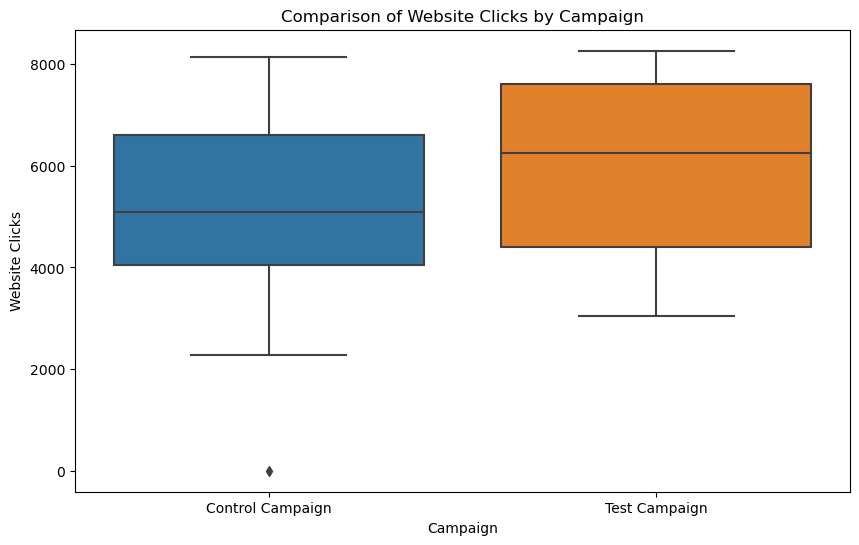

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='campaign_name', y='website_clicks')
plt.title('Comparison of Website Clicks by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Website Clicks')
plt.show()


1.The Campaign with more website clicks is: Test Campaign.

2.Test Campaign had more website clicks compared to the Control Campaign.

3.This information indicates that the Test Campaign attracted a higher number of users to click on the website compared to the Control Campaign.

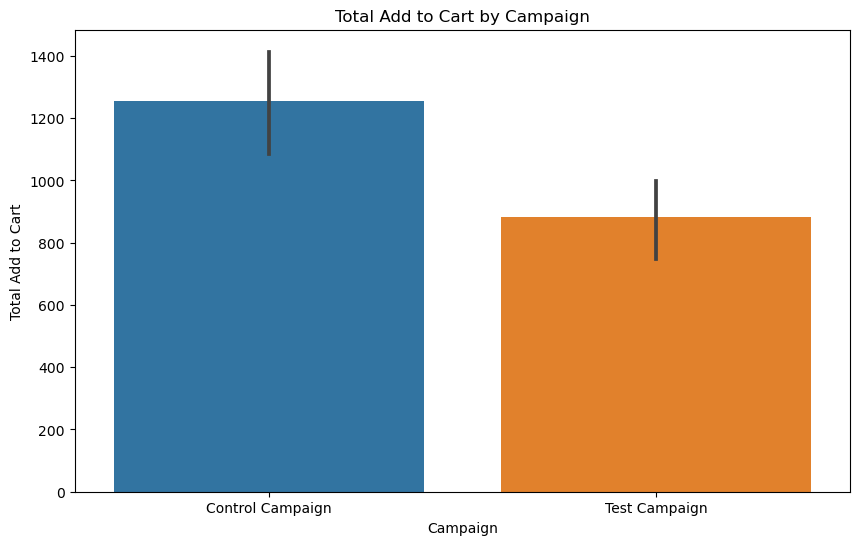

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='campaign_name', y='add_to_cart')
plt.title('Total Add to Cart by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Total Add to Cart')
plt.show()


The 'Control Campaign' had a greater number of 'Add to Cart' actions compared to test campaigns,
highlighting its effectiveness in prompting users to add products to their carts."

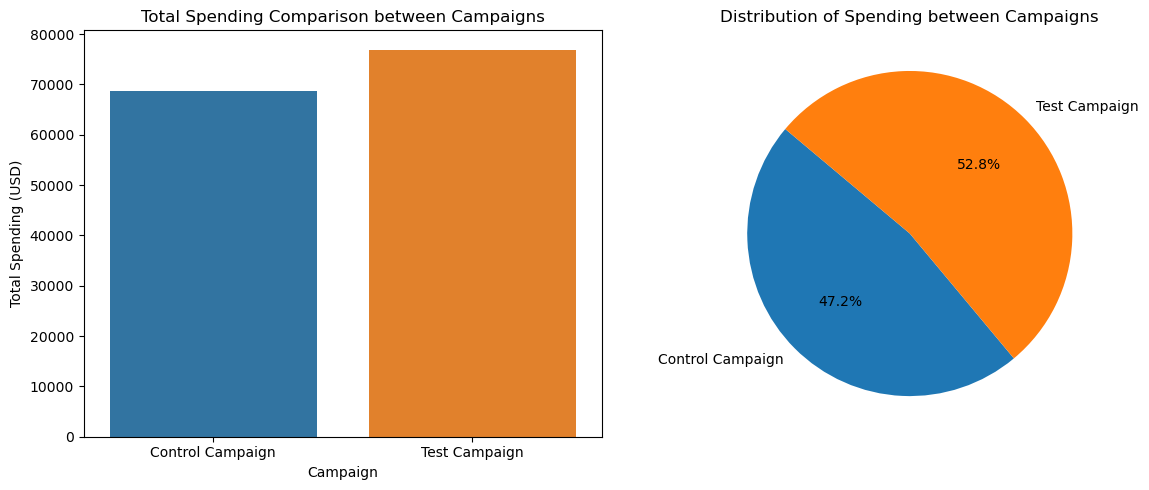

In [130]:
# Calculate the total spending for each campaign
total_spending_by_campaign = merged_df.groupby('campaign_name')['spend_usd'].sum().reset_index()

# Create subplots for both the bar plot and pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar plot
sns.barplot(data=total_spending_by_campaign, x='campaign_name', y='spend_usd', ax=axes[0])
axes[0].set_title('Total Spending Comparison between Campaigns')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Total Spending (USD)')

# Pie chart
axes[1].pie(total_spending_by_campaign['spend_usd'], labels=total_spending_by_campaign['campaign_name'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Spending between Campaigns')

# Adjust layout
plt.tight_layout()
plt.show()


1.Test Campaign spending: $76,892
    
2.Control Campaign spending: $68,653
    
3.This means that the Test Campaign has a higher spending of $76,892 compared to the  Control Campaign's spending of $68,653.

4.The Test Campaign invested more in advertising or other activities reflected by the spending amount.

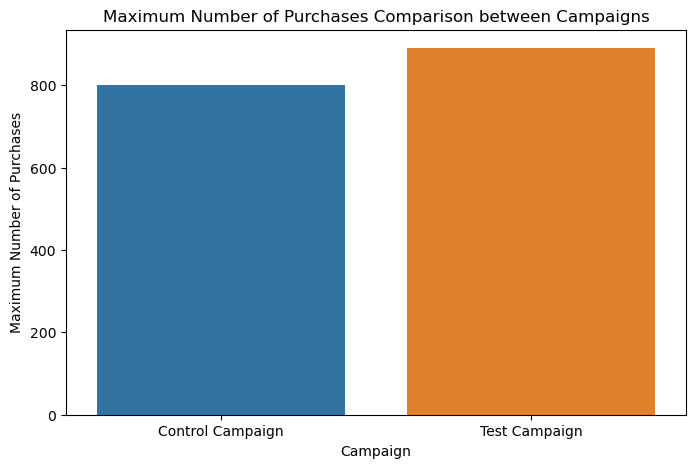

In [135]:
# Calculate the most purchases for each campaign
most_purchases_by_campaign = merged_df.groupby('campaign_name')['purchase'].max().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=most_purchases_by_campaign, x='campaign_name', y='purchase')
plt.title('Maximum Number of Purchases Comparison between Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Maximum Number of Purchases')
plt.show()

Test campaign is showing the max number of purchase

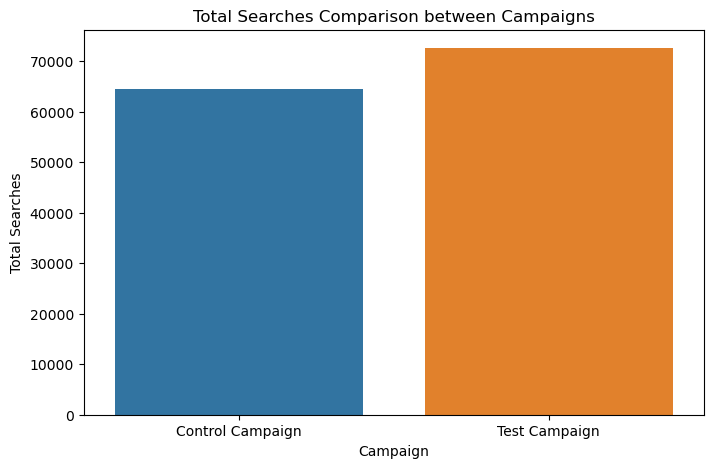

In [120]:
# Calculate the total number of searches for each campaign
total_searches_by_campaign = merged_df.groupby('campaign_name')['searches'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=total_searches_by_campaign, x='campaign_name', y='searches')
plt.title('Total Searches Comparison between Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Total Searches')
plt.show()

The Test Campaign has a higher number of searches, indicating greater user engagement and interest compared to the Control Campaign. 
This suggests the Test Campaign's content is potentially more appealing to users.

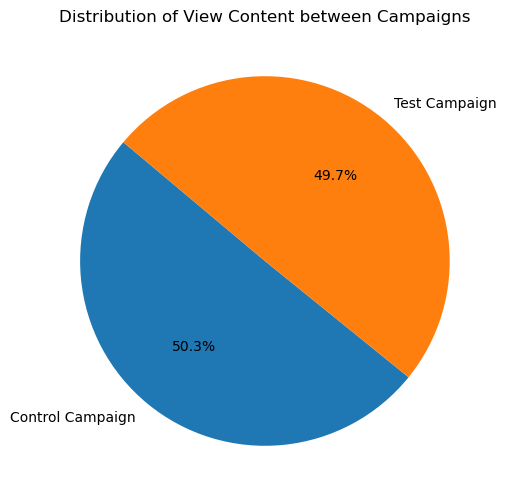

In [121]:
# Calculate the total 'view_content' for each campaign
total_view_content_by_campaign = merged_df.groupby('campaign_name')['view_content'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_view_content_by_campaign, labels=total_view_content_by_campaign.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of View Content between Campaigns')
plt.show()

The Control Campaign saw 50.3% user engagement in "View Content," slightly surpassing the 
Test Campaign's 49.7%, indicating comparable content engagement between the two campaigns.

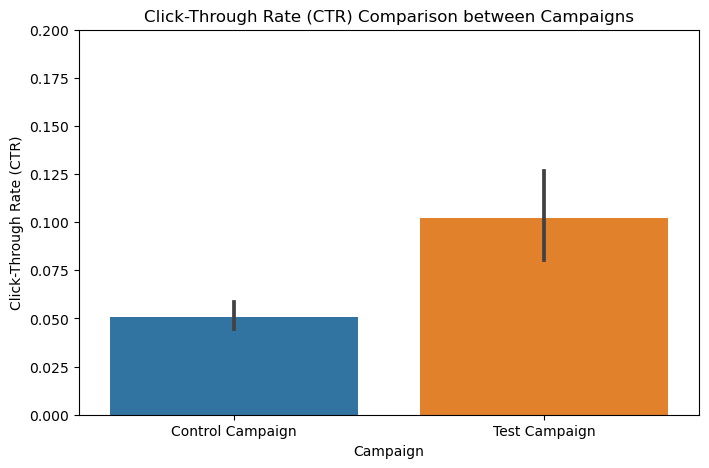

In [132]:
# Calculate Click-Through Rate (CTR) for each campaign
merged_df['ctr'] = merged_df['website_clicks'] / merged_df['impressions']

# Create a bar plot to compare CTR between campaigns
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='campaign_name', y='ctr')
plt.title('Click-Through Rate (CTR) Comparison between Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Click-Through Rate (CTR)')
plt.ylim(0, 0.2)  # Adjust y-axis limit for better visualization
plt.show()


The Test Campaign exhibits a higher Click-Through Rate (CTR) compared to the Control Campaign, 
indicating better audience engagement, which could lead to improved conversion rates.

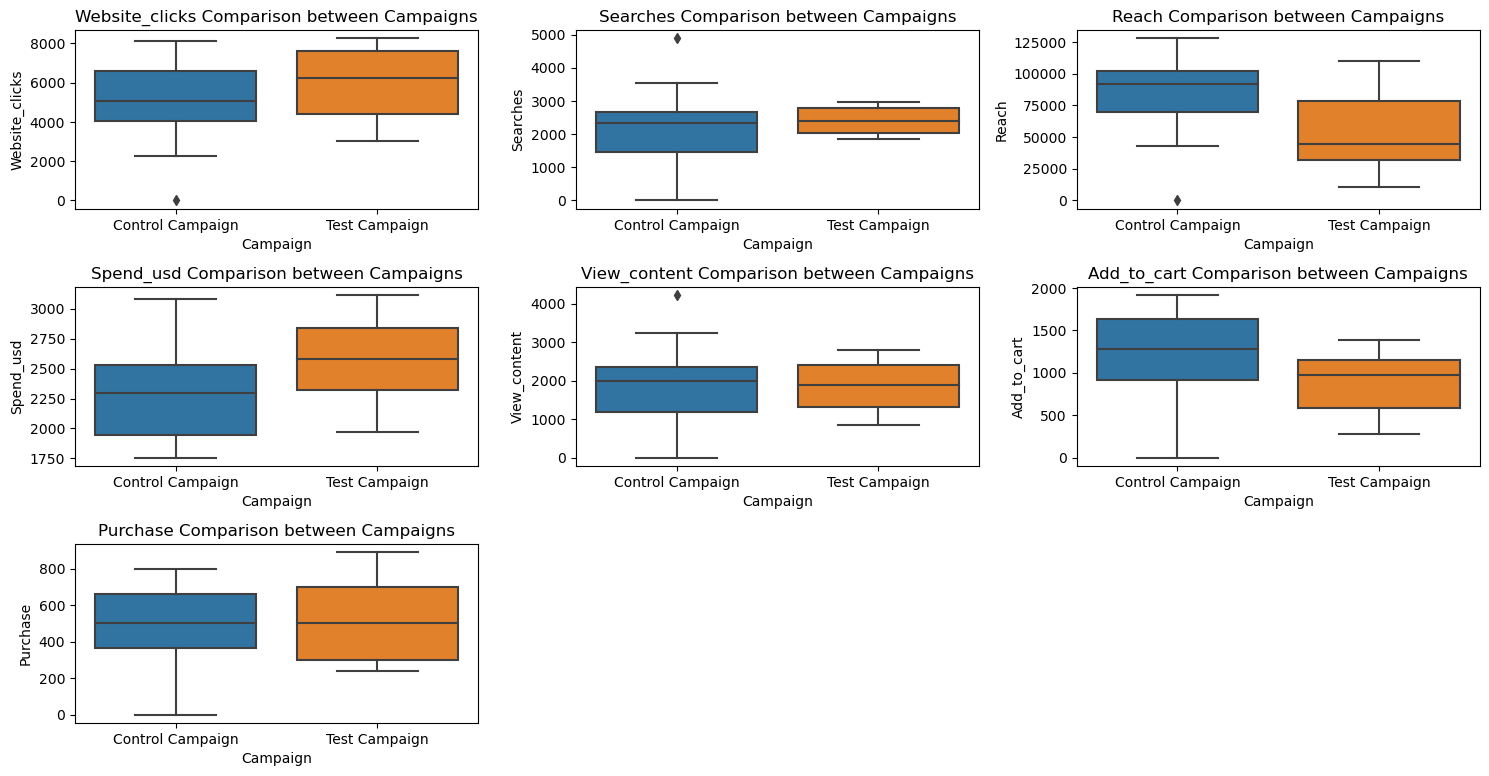

In [137]:
# Define actions to visualize
actions = ['website_clicks', 'searches', 'reach', 'spend_usd', 'view_content', 'add_to_cart', 'purchase']

# Create subplots for each action
plt.figure(figsize=(15, 10))
for i, action in enumerate(actions, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=merged_df, x='campaign_name', y=action)
    plt.title(f'{action.capitalize()} Comparison between Campaigns')
    plt.xlabel('Campaign')
    plt.ylabel(action.capitalize())

plt.tight_layout()
plt.show()

1.The website clicks of control campaign slightly lower than test campaign.


2.The searches comparisons are showing that control campaighn is more searcheable than people than test campaign. 

3.When Comparing reach analysis , the control campaign demonstrates higher values, with a mean reach of approximately 85,883 
  and a median of 91,418, compared to the test campaign's mean of around 53,492 and median of 44,220.


4.View content engagement in the control campaign slightly surpasses that of the test campaign, with a mean of 1879 and 
  median of 1979.5 compared to the test campaign's mean of 1858 and median of 1881.It means that, on average, users in the 
  control campaign tend to engage slightly more with viewing content compared to the test campaign.

5.Add to cart comparison showing that within the "Add to Cart" actions, more users in the control group tend to engage by 
  adding items to their cart compared to the test group.

6.In terms of purchasing, the control group exhibits a slightly stronger engagement, with the 
   25th percentile of purchases exceeding that of the test group.

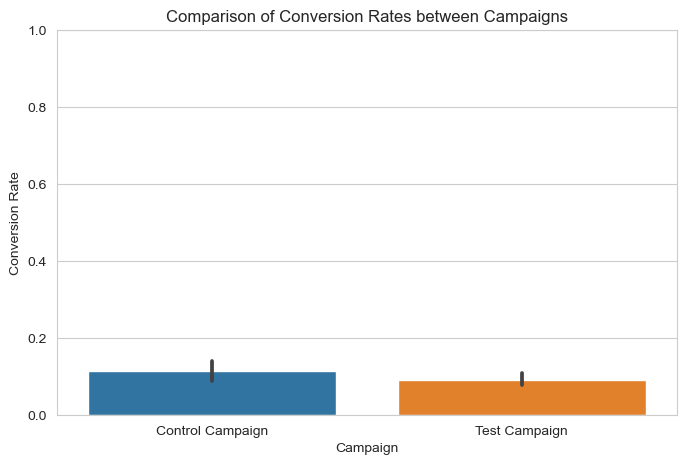

In [153]:
# Calculate conversion rate for each campaign
merged_df['conversion_rate'] = merged_df['purchase'] / merged_df['website_clicks']

# Create a bar plot to compare conversion rates
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='campaign_name', y='conversion_rate')
plt.title('Comparison of Conversion Rates between Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1)  # Set y-axis range between 0 and 1 for better visualization
plt.show()


Control group's higher conversion rate suggests that a greater portion of those who clicked on the website from 
the control campaign made purchases, indicating stronger purchase motivation compared to the test campaign.

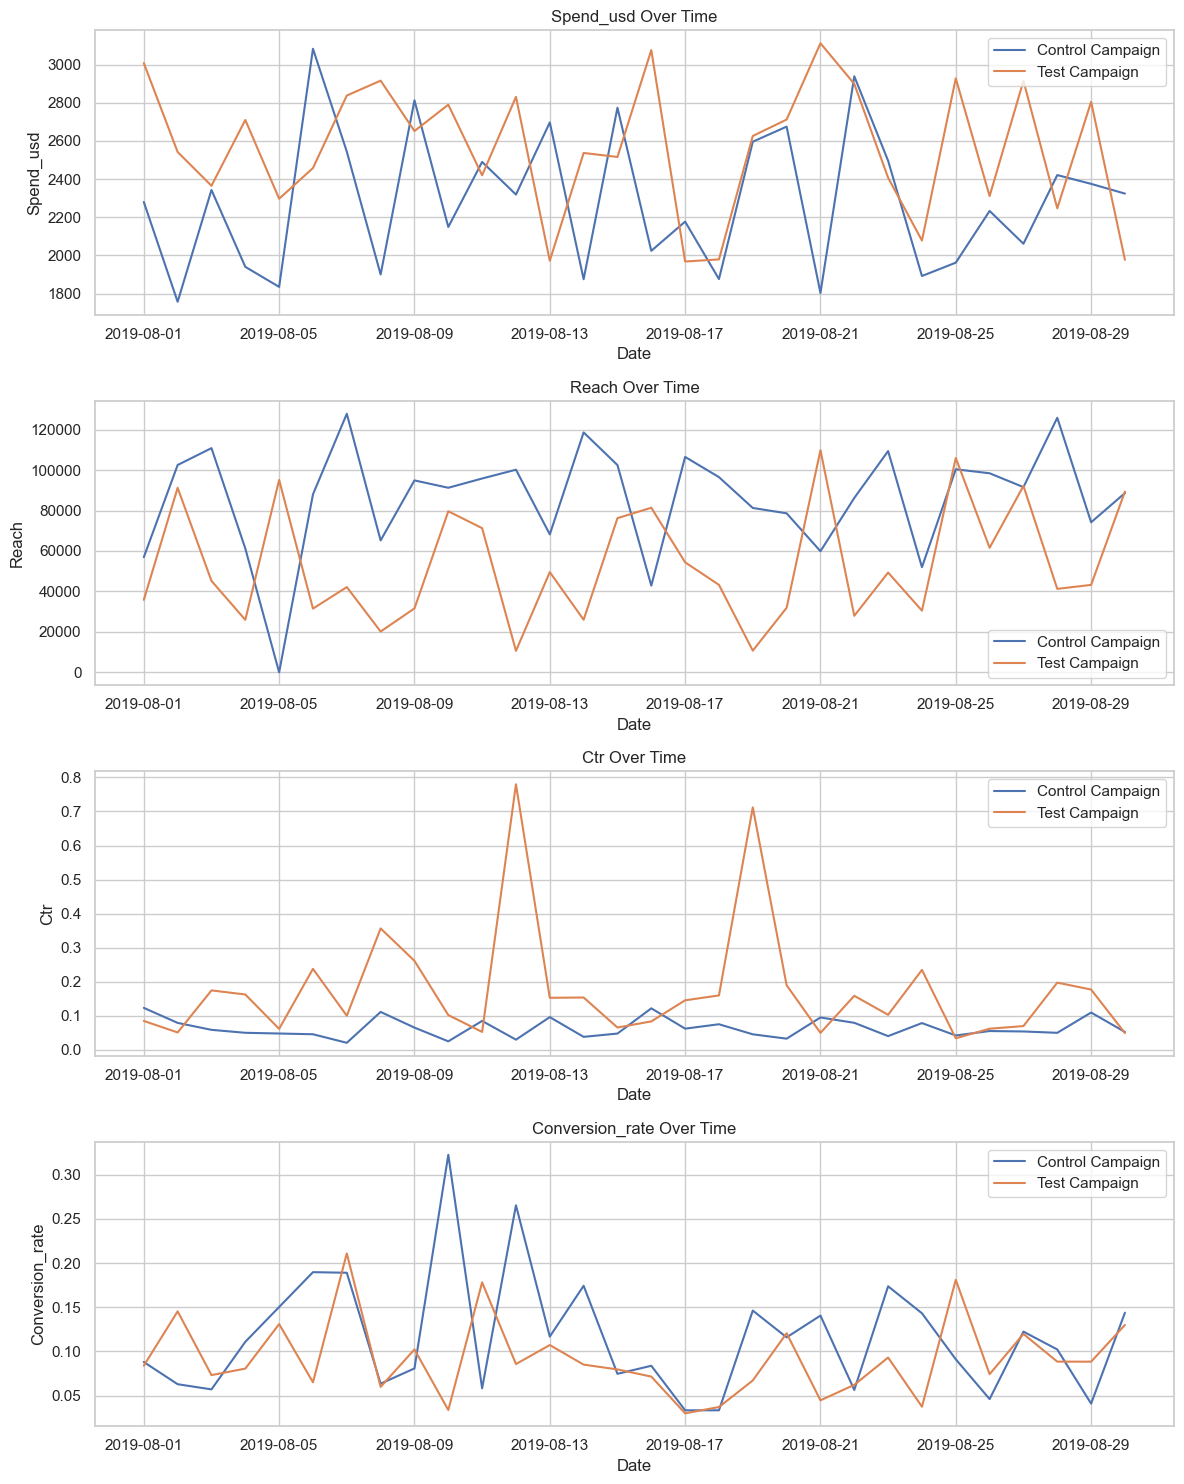

In [155]:
# Set the style
sns.set(style="whitegrid")

# Define the metrics to analyze
metrics_to_analyze = ['spend_usd', 'reach', 'ctr', 'conversion_rate']

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 15))

for i, metric in enumerate(metrics_to_analyze):
    sns.lineplot(data=merged_df, x='date', y=metric, hue='campaign_name', ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].legend()

plt.tight_layout()
plt.show()


# AB testing

In [33]:
# Calculate total reach and total clicks for the Control Campaign
reach_cont = merged_df.loc[merged_df['campaign_name'] == 'Control Campaign']['reach'].sum()
click_cont = merged_df.loc[merged_df['campaign_name'] == 'Control Campaign']['website_clicks'].sum()

# Calculate CTR for the Control Campaign
ctr_cont = click_cont / reach_cont

# Calculate total reach and total clicks for the Test Campaign
reach_test = merged_df.loc[merged_df['campaign_name'] == 'Test Campaign']['reach'].sum()
click_test = merged_df.loc[merged_df['campaign_name'] == 'Test Campaign']['website_clicks'].sum()

# Calculate CTR for the Test Campaign
ctr_test = click_test / reach_test

# Calculate the observed difference in CTR between Test and Control Campaigns
obs_diff_ctr = ctr_test - ctr_cont

# Print the observed difference in CTR
print("Observed Difference in CTR:", obs_diff_ctr)


Observed Difference in CTR: 0.052883131704843635


In the click-through rate (CTR) analysis, we compared the performance of the "Test Campaign" and 
the "Control Campaign." The observed difference in CTR between the two campaigns was calculated to be 
approximately 0.053. This indicates that the CTR for the "Test Campaign" is around 5.3% higher than that of the 
"Control Campaign.

In [35]:
# Create an empty list to store the differences between click-through rates
diffs_ctr = []

# Repeat the following steps 10,000 times
for i in range(10000):
   
    b_sample = merged_df.sample( merged_df.shape[0], replace=True)
    
    # Calculate the click-through rate for the Control Group in this sample
    samp_rh_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']["reach"].sum()
    samp_ck_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']["website_clicks"].sum()
    samp_ctr_cont = samp_ck_cont / samp_rh_cont
    
    # Calculate the click-through rate for the Test Group in this sample
    samp_rh_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']["reach"].sum()
    samp_ck_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']["website_clicks"].sum()
    samp_ctr_test = samp_ck_test / samp_rh_test
    
    # Calculate the difference in click-through rates for this sample and add it to the list
    diffs_ctr.append(samp_ctr_test - samp_ctr_cont)
    
    # Convert the list of differences to a numpy array
    diffs_ctr = np.array(diffs_ctr)

    # Find the lower and upper bounds of the confidence interval using percentiles
    low, high = np.percentile(diffs_ctr, 2.5), np.percentile(diffs_ctr, 97.5)

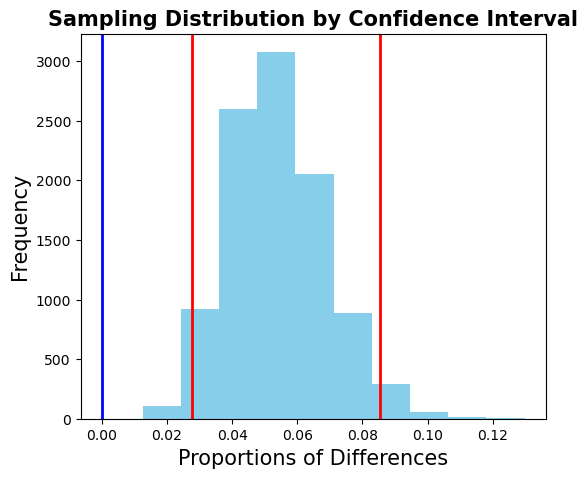

In [39]:
# Looking at the sampling distribution through the histogram
plt.figure(figsize=(6, 5))
plt.hist(diffs_ctr, color='skyblue') 

plt.title('Sampling Distribution by Confidence Interval', fontsize=15, fontweight="bold")
plt.xlabel('Proportions of Differences', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.axvline(x=low, color='red', linewidth=2)  # Red line for lower bound
plt.axvline(x=high, color='red', linewidth=2) # Red line for upper bound
plt.axvline(x=0, color='blue', linewidth=2)  # Blue line for observed difference

plt.show()  # Display the  graph

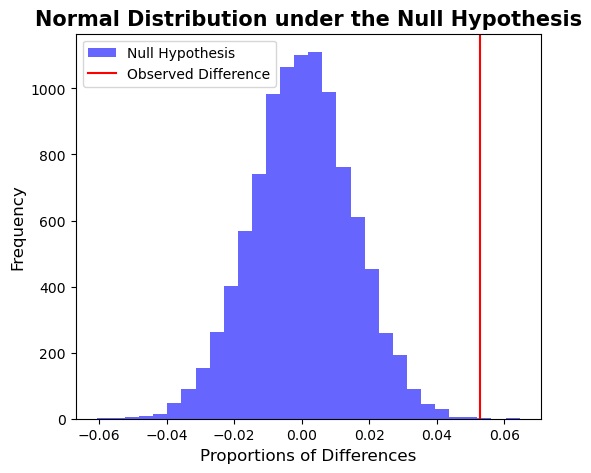

The p-value is: 0.0002


In [41]:
null_vals = np.random.normal(0, diffs_ctr.std(), diffs_ctr.size)

plt.figure(figsize=(6, 5))
plt.hist(null_vals, bins=30, alpha=0.6, color='blue', label='Null Hypothesis')
plt.axvline(obs_diff_ctr, color='red', label='Observed Difference')
plt.title('Normal Distribution under the Null Hypothesis', fontsize=15, fontweight='bold')
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


p_value = (null_vals > obs_diff_ctr).mean()
print("The p-value is: {}".format(p_value))

1.The p-value of 0.0002, which is significantly less than the common significance level of 0.05, indicates a
  strong rejection of the null hypothesis. 

2.This supports the acceptance of the alternative hypothesis, suggesting that the new landing page is indeed performing
  better in terms of click-through rates compared to the old landing page.

In [42]:
#comparing the average number of searches between the control campaign and the test campaign

search_cont = merged_df.loc[merged_df['campaign_name'] == 'Control Campaign']['searches'].mean()
search_test = merged_df.loc[merged_df['campaign_name'] == 'Test Campaign']['searches'].mean()

obs_dif_srch = search_test - search_cont

print(obs_dif_srch)


271.6999999999998


The output value of 271.70 means that, on average, there are approximately 271.70 more searches per user in 
the test campaign compared to the control campaign. 

In [43]:
# Initialize an empty list to store differences
diffs_srch = []

# Simulate 10,000 bootstrap samples
for i in range(10000):
    # Create a bootstrap sample with replacement
    b_sample = merged_df.sample(merged_df.shape[0], replace=True)
    
    # Calculate average searches for control and test groups in the sample
    samp_srh_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']['searches'].mean()
    samp_srh_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']['searches'].mean()
    
    # Calculate and store the difference in average searches for this sample
    diffs_srch.append(samp_srh_test - samp_srh_cont)

# Convert the differences list to a numpy array
diffs_srch = np.array(diffs_srch)

# Calculate the lower and upper bounds of the 95% confidence interval
low, high = np.percentile(diffs_srch, 2.5), np.percentile(diffs_srch, 97.5)

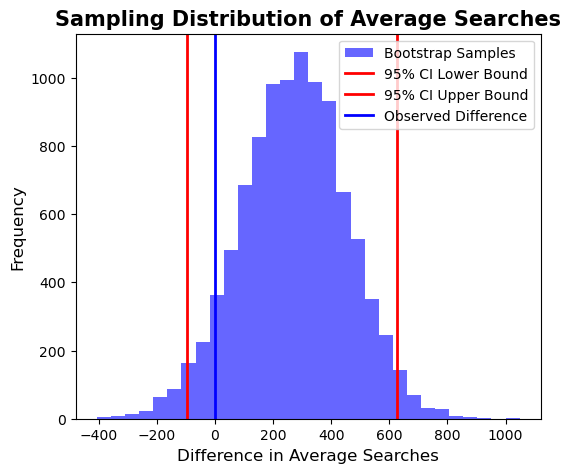

In [44]:
# Plotting the histogram of differences with confidence interval lines
plt.figure(figsize=(6, 5))
plt.hist(diffs_srch, bins=30, alpha=0.6, color='blue', label='Bootstrap Samples')
plt.axvline(low, color='red', linewidth=2, label='95% CI Lower Bound')
plt.axvline(high, color='red', linewidth=2, label='95% CI Upper Bound')
plt.axvline(0, color='blue', linewidth=2, label='Observed Difference')
plt.title('Sampling Distribution of Average Searches', fontsize=15, fontweight='bold')
plt.xlabel('Difference in Average Searches', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

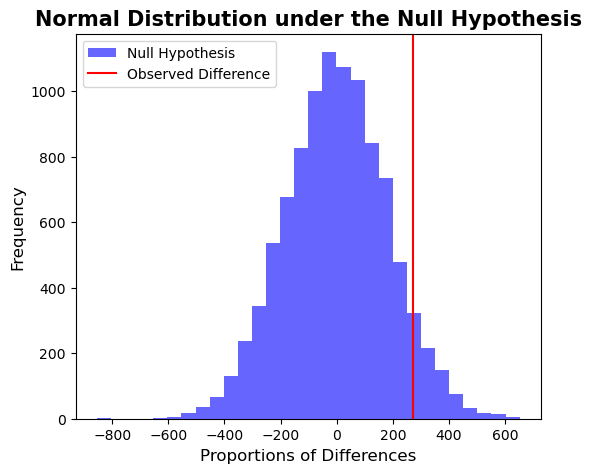

The p-value is: 0.0693


In [50]:
null_vals = np.random.normal(0, diffs_srch.std(), diffs_srch.size)

plt.figure(figsize=(6, 5))
plt.hist(null_vals, bins=30, alpha=0.6, color='blue', label='Null Hypothesis')
plt.axvline(obs_dif_srch, color='red', label='Observed Difference')
plt.title('Normal Distribution under the Null Hypothesis', fontsize=15, fontweight='bold')
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


p_value = (null_vals > obs_dif_srch).mean()
print("The p-value is:", p_value)

In [52]:
view_cont = merged_df.loc[merged_df['campaign_name'] == 'Control Campaign']["view_content"].mean()
view_test = merged_df.loc[merged_df['campaign_name'] == 'Test Campaign']["view_content"].mean()

obs_dif_vi = view_test - view_cont

print("Observed Difference in Average Content Views:", obs_dif_vi)

Observed Difference in Average Content Views: -21.0


1.The test campaign had an average of 21 fewer content views compared to the control campaign.

2.This negative difference suggests that the control campaign may have performed slightly better in terms of 
  generating content views.

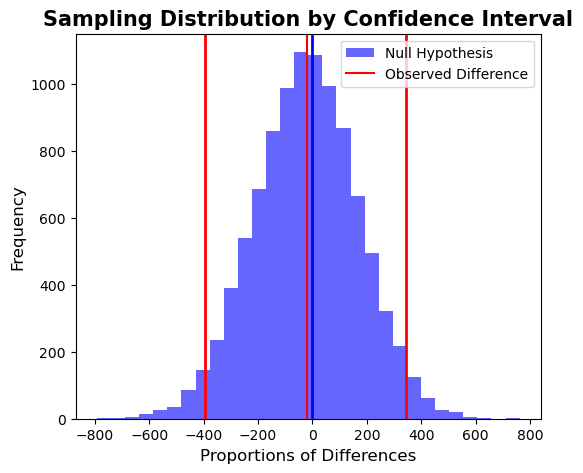

The p-value is: 0.5415


In [54]:
diffs_view = []

for i in range(10000):
    b_sample = merged_df.sample(merged_df.shape[0], replace=True)
    
    samp_vi_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']["view_content"].mean()
    samp_vi_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']["view_content"].mean()
    
    diffs_view.append(samp_vi_test - samp_vi_cont)
diffs_view = np.array(diffs_view)

low, high = np.percentile(diffs_view, 2.5), np.percentile(diffs_view, 97.5)

plt.figure(figsize=(6, 5))
plt.hist(diffs_view, bins=30, alpha=0.6, color='blue', label='Null Hypothesis')
plt.axvline(obs_dif_vi, color='red', label='Observed Difference')
plt.title('Sampling Distribution by Confidence Interval', fontsize=15, fontweight='bold')
plt.xlabel('Proportions of Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=high, color='r', linewidth=2)
plt.axvline(x=0, color='b', linewidth=2)
plt.legend()
plt.show()

print("The p-value is: {}".format((null_vals > obs_dif_vi).mean()))

The p-value of 0.5415 suggests that the new landing page's impact on average content views is likely not significant compared to the old page

In [58]:
# Calculate the mean "adding to cart" rate for the control campaign
cart_cont = merged_df.loc[merged_df['campaign_name'] == 'Control Campaign']['add_to_cart'].mean()

# Calculate the mean "adding to cart" rate for the test campaign
cart_test = merged_df.loc[merged_df['campaign_name'] == 'Test Campaign']['add_to_cart'].mean()

# Calculate the observed difference in "adding to cart" rates between the test and control campaigns
obs_dif_ct = cart_test - cart_cont

# Initialize an empty list to store the differences in "adding to cart" rates for bootstrap sampling
diffs_cart = []

# Perform bootstrap sampling 10,000 times
for i in range(10000):
    # Randomly sample from the DataFrame merged_df with replacement to simulate a bootstrap sample
    b_sample = merged_df.sample(merged_df.shape[0], replace=True)
    
    # Calculate the mean "adding to cart" rate for the control group in the bootstrap sample
    samp_ct_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']['add_to_cart'].mean()
    
    # Calculate the mean "adding to cart" rate for the test group in the bootstrap sample
    samp_ct_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']['add_to_cart'].mean()
    
    # Calculate the difference between the "adding to cart" rates of the test and control groups in the bootstrap sample
    diffs_cart.append(samp_ct_test - samp_ct_cont)

# Convert the list of differences to a numpy array
diffs_cart = np.array(diffs_cart)

# Calculate the lower and upper bounds of the confidence interval
low, high = np.percentile(diffs_cart, 2.5), np.percentile(diffs_cart, 97.5)

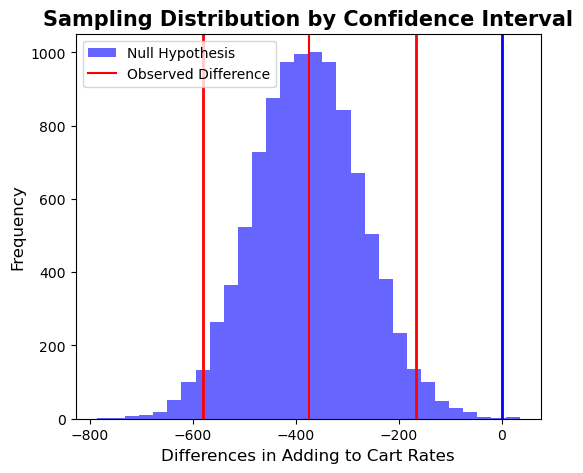

In [59]:
# Plot the sampling distribution through a histogram
plt.figure(figsize=(6, 5))
plt.hist(diffs_cart, bins=30, alpha=0.6, color='blue', label='Null Hypothesis')
plt.axvline(obs_dif_ct, color='red', label='Observed Difference')
plt.title('Sampling Distribution by Confidence Interval', fontsize=15, fontweight='bold')
plt.xlabel('Differences in Adding to Cart Rates', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(x=low, color='r', linewidth=2)
plt.axvline(x=high, color='r', linewidth=2)
plt.axvline(x=0, color='b', linewidth=2)
plt.legend()
plt.show()

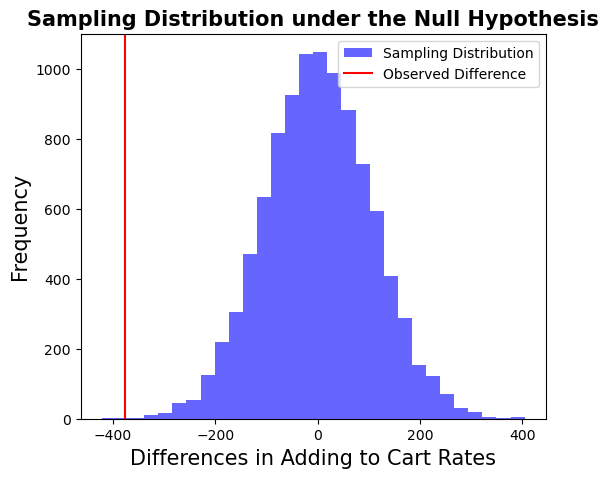

The p-value is: 0.9999


In [61]:
# Create a sampling distribution of differences in "adding to cart" rates under the null hypothesis
null_vals = np.random.normal(0, diffs_cart.std(), diffs_cart.size)

# Create a figure to plot the histogram
plt.figure(figsize=(6, 5))

# Plot a histogram of the sampling distribution using blue bars
plt.hist(null_vals, bins=30, alpha=0.6, color='blue', label='Sampling Distribution')

# Add a vertical red line at the observed difference in "adding to cart" rates
plt.axvline(obs_dif_ct, c="red", label='Observed Difference')

# Set the title of the plot
plt.title('Sampling Distribution under the Null Hypothesis', fontsize=15, fontweight="bold")

# Set the label for the x-axis
plt.xlabel('Differences in Adding to Cart Rates', fontsize=15)

# Set the label for the y-axis
plt.ylabel('Frequency', fontsize=15)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
print("The p-value is: {}".format((null_vals > obs_dif_ct).mean()))

1.The analysis suggests that in the test campaign, people are not adding as many items to their carts compared to the 
control campaign. 

2.The negative observed difference and its position relative to the null distribution indicate that the test campaign is performing worse in terms of the "adding to cart" metric.

3.The p-value of 0.9999 indicates that the  test and control campaigns is not statistically significant so there is no strong evidence to suggest that the test campaign performs differently in terms of adding items to the cart compared to the control campaign.

In [66]:
pur_cont = merged_df.loc[merged_df['campaign_name'] == 'Control Campaign']["purchase"].mean()
pur_test = merged_df.loc[merged_df['campaign_name'] == 'Test Campaign']["purchase"].mean()

obs_dif_pur = pur_test - pur_cont

obs_dif_pur

diffs_pur = []

for i in range(10000):
    b_sample = merged_df.sample(merged_df.shape[0], replace=True)
    
    samp_pur_cont = b_sample.loc[b_sample['campaign_name'] == 'Control Campaign']["purchase"].mean()
    samp_pur_test = b_sample.loc[b_sample['campaign_name'] == 'Test Campaign']["purchase"].mean()
    
    diffs_pur.append(samp_pur_test - samp_pur_cont)
    
diffs_pur = np.array(diffs_pur)  # convert to numpy array
low, high = np.percentile(diffs_pur, 2.5), np.percentile(diffs_pur, 97.5)

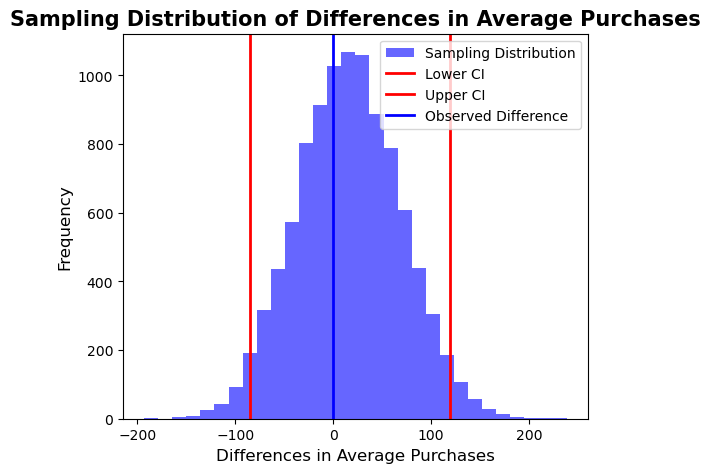

In [67]:
# Looking at the sampling distribution through the histogram
plt.figure(figsize=(6, 5))  # Set the figure size

# Create a histogram of the differences in average purchases
plt.hist(diffs_pur, bins=30, alpha=0.6, color='blue', label='Sampling Distribution')

# Add a title and labels for the axes
plt.title('Sampling Distribution of Differences in Average Purchases', fontsize=15, fontweight="bold")
plt.xlabel('Differences in Average Purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical lines to indicate critical values
plt.axvline(x=low, color='r', linewidth=2, label='Lower CI')
plt.axvline(x=high, color='r', linewidth=2, label='Upper CI')
plt.axvline(x=0, color='b', linewidth=2, label='Observed Difference')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [68]:
p_value = (null_vals > obs_dif_pur).mean()
print("The p-value is: {:.4f}".format(p_value))

The p-value is: 0.4419


In [69]:
# Calculate the adjusted alpha values using Holm-Bonferroni correction
hb = {'searches': 0.1352, 'purchase': 0.5147, 'view content': 0.6819, 'add to cart': 1}
adjusted_alphas = [0.05 / (len(hb) - i + 1) for i in range(1, len(hb) + 1)]

# Compare p-values with adjusted alpha values and make a decision
for i, key in enumerate(hb):
    p_value = hb[key]
    adjusted_alpha = adjusted_alphas[i]
    
    if p_value > adjusted_alpha:
        print(f"The Rank of {key}: p-value({p_value:.3f}) > adjusted alpha({adjusted_alpha:.3f}) Fail Reject Null Hypotheses")
    else:
        print(f"The Rank of {key}: p-value({p_value:.3f}) < adjusted alpha({adjusted_alpha:.3f}) Reject Null Hypotheses")


The Rank of searches: p-value(0.135) > adjusted alpha(0.013) Fail Reject Null Hypotheses
The Rank of purchase: p-value(0.515) > adjusted alpha(0.017) Fail Reject Null Hypotheses
The Rank of view content: p-value(0.682) > adjusted alpha(0.025) Fail Reject Null Hypotheses
The Rank of add to cart: p-value(1.000) > adjusted alpha(0.050) Fail Reject Null Hypotheses


## Based on the A/B testing analysis:

1.Based on the conducted analysis, it can be deduced that there isn't substantial statistical evidence suggesting consistent superior performance of any tested campaign variations over the original control group. 

2.However considering the context, and analysis the test campaign might still be the most favorable option moving forward..

## Thank you